In [1]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import torch
from torch.utils.data import DataLoader, random_split

from datasets.datasets import Dataset_TEMImageNet
from models.GAN.GAN import Generator, Discriminator
from models.GAN.trainer import train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
# TEMImageNet
label_type = 'noBackgroundnoNoise'
dataset = Dataset_TEMImageNet(label_type, num_classes=1)
# 计算划分的样本数量
ratio = 0.9
train_size = int(ratio * len(dataset))
valtest_size = len(dataset) - train_size
val_size = int(ratio * valtest_size)
test_size = valtest_size - val_size

# 使用 random_split 函数划分数据集
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(14128))
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=32, pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

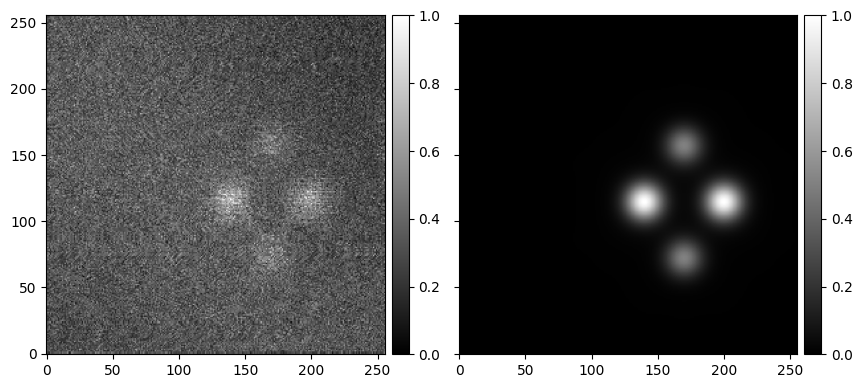

In [3]:
image, label = dataset[5]
fig = plt.figure(figsize=(10, 5))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.5, cbar_mode="each", cbar_size="5%", cbar_pad="2%")

im = grid[0].imshow(image[0], cmap='gray')
grid[0].invert_yaxis()
grid.cbar_axes[0].colorbar(im)

im = grid[1].imshow(label[0], cmap='gray')
grid[1].invert_yaxis()
grid.cbar_axes[1].colorbar(im)
plt.show()

In [ ]:
# 训练GAN
epochs = 100
lr_g = 0.0002
lr_d = 0.0002
generator = Generator()
discriminator = Discriminator()
# generator.load_state_dict(torch.load('F:\\QBC\\STEM-PyTorch-v2.0\\results\\GAN_20240415-190617_lr_g=0.0002_lr_d=0.0002_noBackgroundnoNoise\\99_weight.pth'))
# discriminator.load_state_dict(torch.load('F:\\QBC\\STEM-PyTorch-v2.0\\results\\GAN_20240415-190617_lr_g=0.0002_lr_d=0.0002_noBackgroundnoNoise\\99_discriminator.pth'))
info = label_type
current_time = datetime.datetime.now()
current_time = datetime.datetime.strftime(current_time, r'%Y%m%d-%H%M%S')
save_path = os.path.join('results', f'GAN_{current_time}_lr_g={lr_g}_lr_d={lr_d}_{info}')
train(generator, discriminator, device, save_path, train_dataloader, learning_rate_g=lr_g, learning_rate_d=lr_d, epochs=epochs)

In [ ]:
for name, param in discriminator.named_parameters():
    print(name)